In [31]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
aviation = pd.read_csv('../Data/AviationFinal.csv')
aviation

,Country,WeatherCondition,BroadPhaseOfFlight,AircraftDamage,InvestigationType,PurposeOfFlight,EngineType,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,TotalInjuries,EventDate,Month,Year
0,New Zealand,UNK,MANEUVERING,Substantial,Accident,Unknown,Turbo Shaft,0.0,0.0,0.0,1.0,0.0,2016-11-14,11,2016
1,Panama,VMC,LANDING,Substantial,Accident,Unknown,Unknown,0.0,0.0,0.0,2.0,0.0,2016-11-14,11,2016
2,United States,VMC,TAKEOFF,Substantial,Accident,Personal,Reciprocating,0.0,0.0,0.0,1.0,0.0,2016-11-13,11,2016
3,United States,VMC,MANEUVERING,Substantial,Accident,Instructional,Reciprocating,0.0,0.0,0.0,2.0,0.0,2016-12-11,12,2016
4,United States,VMC,UNKNOWN,Substantial,Accident,Personal,Reciprocating,0.0,1.0,0.0,1.0,1.0,2016-12-11,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79136,United States,VMC,APPROACH,Destroyed,Accident,Personal,Unknown,1.0,2.0,0.0,0.0,3.0,1979-02-08,2,1979
79137,United States,IMC,CRUISE,Destroyed,Accident,Personal,Reciprocating,2.0,0.0,0.0,0.0,2.0,1977-06-19,6,1977
79138,United States,IMC,CRUISE,Destroyed,Accident,Personal,Reciprocating,3.0,0.0,0.0,0.0,3.0,1974-08-30,8,1974
79139,United States,UNK,UNKNOWN,Destroyed,Accident,Personal,Reciprocating,4.0,0.0,0.0,0.0,4.0,1962-07-19,7,1962


In [33]:
aviation.isnull().sum()

Country                 507
WeatherCondition          0
BroadPhaseOfFlight        0
AircraftDamage            0
InvestigationType         0
PurposeOfFlight           0
EngineType                0
TotalFatalInjuries        0
TotalSeriousInjuries      0
TotalMinorInjuries        0
TotalUninjured            0
TotalInjuries             0
EventDate                 0
Month                     0
Year                      0
dtype: int64

In [35]:
#for quick analysis, will drop, GINI index(world Banks estimate, and gini fo household income)
#aviation = aviation.drop(columns =['EventID'])

In [47]:
#cleandata=aviation.groupby('Country').mean().reset_index()

In [49]:
aviation

,Country,WeatherCondition,BroadPhaseOfFlight,AircraftDamage,InvestigationType,PurposeOfFlight,EngineType,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,TotalInjuries,EventDate,Month,Year
0,New Zealand,UNK,MANEUVERING,Substantial,Accident,Unknown,Turbo Shaft,0.0,0.0,0.0,1.0,0.0,2016-11-14,11,2016
1,Panama,VMC,LANDING,Substantial,Accident,Unknown,Unknown,0.0,0.0,0.0,2.0,0.0,2016-11-14,11,2016
2,United States,VMC,TAKEOFF,Substantial,Accident,Personal,Reciprocating,0.0,0.0,0.0,1.0,0.0,2016-11-13,11,2016
3,United States,VMC,MANEUVERING,Substantial,Accident,Instructional,Reciprocating,0.0,0.0,0.0,2.0,0.0,2016-12-11,12,2016
4,United States,VMC,UNKNOWN,Substantial,Accident,Personal,Reciprocating,0.0,1.0,0.0,1.0,1.0,2016-12-11,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79136,United States,VMC,APPROACH,Destroyed,Accident,Personal,Unknown,1.0,2.0,0.0,0.0,3.0,1979-02-08,2,1979
79137,United States,IMC,CRUISE,Destroyed,Accident,Personal,Reciprocating,2.0,0.0,0.0,0.0,2.0,1977-06-19,6,1977
79138,United States,IMC,CRUISE,Destroyed,Accident,Personal,Reciprocating,3.0,0.0,0.0,0.0,3.0,1974-08-30,8,1974
79139,United States,UNK,UNKNOWN,Destroyed,Accident,Personal,Reciprocating,4.0,0.0,0.0,0.0,4.0,1962-07-19,7,1962


In [50]:
cle = aviation.fillna(aviation.mean())

In [53]:
#LabelEncoder for each country for preprocessing
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
aviation['country_no'] = lb_make.fit_transform(aviation['Country'].astype('str'))
aviation['WeatherCondition'] = lb_make.fit_transform(aviation['WeatherCondition'].astype('str'))
aviation['BroadPhaseOfFlight'] = lb_make.fit_transform(aviation['BroadPhaseOfFlight'].astype('str'))
aviation['AircraftDamage'] = lb_make.fit_transform(aviation['AircraftDamage'].astype('str'))
aviation['InvestigationType'] = lb_make.fit_transform(aviation['InvestigationType'].astype('str'))
aviation['PurposeOfFlight'] = lb_make.fit_transform(aviation['PurposeOfFlight'].astype('str'))
aviation['EngineType'] = lb_make.fit_transform(aviation['EngineType'].astype('str'))
aviation['EventDate'] = lb_make.fit_transform(aviation['EventDate'].astype('str'))
aviation['Month'] = lb_make.fit_transform(aviation['Month'].astype('str'))
aviation['Year'] = lb_make.fit_transform(aviation['Year'].astype('str'))


In [54]:
aviation.isnull().sum()

Country                 507
WeatherCondition          0
BroadPhaseOfFlight        0
AircraftDamage            0
InvestigationType         0
PurposeOfFlight           0
EngineType                0
TotalFatalInjuries        0
TotalSeriousInjuries      0
TotalMinorInjuries        0
TotalUninjured            0
TotalInjuries             0
EventDate                 0
Month                     0
Year                      0
country_no                0
dtype: int64

In [26]:
categorical_var = np.where(aviation.dtypes != np.float)[0]

In [78]:
#import train_test_split function
from sklearn.model_selection import train_test_split
x = aviation[['WeatherCondition','BroadPhaseOfFlight', 'AircraftDamage','InvestigationType','PurposeOfFlight','EngineType','TotalFatalInjuries','TotalSeriousInjuries','TotalMinorInjuries','TotalUninjured','TotalInjuries','EventDate','Month','Year']]
#x = pd.get_dummies(x)
y = aviation['country_no'] #labels

#split dataset into training set and test set
#split 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [79]:
#Import random forest model
from sklearn.ensemble import RandomForestClassifier

#create a gaussian classifier
clf = RandomForestClassifier(n_estimators = 100)

#train th emodel using training set
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
y_pred = clf.predict(x_test)

In [81]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9443204312850103


In [82]:
aviation_df = aviation.drop(columns = 'Country')

In [83]:
temp_list = []
for i in aviation_df:
    if i != 'country_no':
        temp_list.append(i)

In [84]:
print(len(temp_list))
temp_list

14


['WeatherCondition',
 'BroadPhaseOfFlight',
 'AircraftDamage',
 'InvestigationType',
 'PurposeOfFlight',
 'EngineType',
 'TotalFatalInjuries',
 'TotalSeriousInjuries',
 'TotalMinorInjuries',
 'TotalUninjured',
 'TotalInjuries',
 'EventDate',
 'Month',
 'Year']

In [85]:
feature_imp = pd.Series(clf.feature_importances_, index = temp_list).sort_values(ascending = False)
feature_imp

EventDate               0.179096
BroadPhaseOfFlight      0.150015
Year                    0.108183
EngineType              0.101131
Month                   0.097586
PurposeOfFlight         0.076607
WeatherCondition        0.065940
TotalUninjured          0.056764
TotalInjuries           0.041306
TotalFatalInjuries      0.037797
AircraftDamage          0.031931
TotalMinorInjuries      0.023961
TotalSeriousInjuries    0.018615
InvestigationType       0.011069
dtype: float64

No handles with labels found to put in legend.


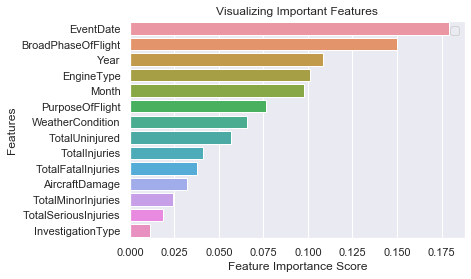

In [86]:
%matplotlib inline
#creating a bar plot
sb.barplot(x=feature_imp, y=feature_imp.index)
#add labels to graph
plt.xlabel("Feature Importance Score")
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()